# Generate Dummy Data

In [2]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import numpy as np

def generate_data(n_samples, seed=42):
    np.random.seed(seed)
    # Initialize data dictionary
    data_conditional = {
        "ID Anak": range(1, n_samples + 1),
        "Risiko Stunting": np.random.choice([0, 1], size=n_samples)  # Random stunting risk label
    }

    # Define ranges for conditional data based on 'Risiko Stunting'
    data_conditional["Usia (bulan)"] = np.random.randint(6, 60, size=n_samples)

    # Assign weight and height ranges as reasonable values based on age
    data_conditional["Berat Badan (kg)"] = np.where(data_conditional["Risiko Stunting"] == 0,
                                                    np.round(np.random.uniform(10, 18, size=n_samples), 1),
                                                    np.round(np.random.uniform(7, 13, size=n_samples), 1))

    data_conditional["Tinggi Badan (cm)"] = np.where(data_conditional["Risiko Stunting"] == 0,
                                                    np.round(np.random.uniform(80, 110, size=n_samples), 1),
                                                    np.round(np.random.uniform(65, 85, size=n_samples), 1))

    data_conditional["Asupan Gizi (Kcal/hari)"] = np.where(data_conditional["Risiko Stunting"] == 0,
                                                        np.random.randint(1300, 1600, size=n_samples),
                                                        np.random.randint(900, 1200, size=n_samples))

    data_conditional["Kualitas Air (%)"] = np.where(data_conditional["Risiko Stunting"] == 0,
                                                    np.random.randint(85, 100, size=n_samples),
                                                    np.random.randint(60, 85, size=n_samples))

    data_conditional["Status Ekonomi"] = np.where(data_conditional["Risiko Stunting"] == 0,
                                                np.random.choice([2, 3], size=n_samples),  # Better economic status
                                                np.random.choice([1, 2], size=n_samples))  # Lower economic status

    data_conditional["Akses Fasilitas Kesehatan"] = np.where(data_conditional["Risiko Stunting"] == 0,
                                                            1,  # Good healthcare access
                                                            np.random.choice([0, 1], size=n_samples))

    data_conditional["Riwayat Kesehatan"] = np.where(data_conditional["Risiko Stunting"] == 0,
                                                    1,  # Good health history
                                                    np.random.choice([0, 1], size=n_samples))

    # Convert the data dictionary to a DataFrame
    df_dummy_data_conditional = pd.DataFrame(data_conditional)

    # Display the first few rows of the new dummy data
    return df_dummy_data_conditional


In [3]:
# Generate dummy data
df_dummy_data_conditional = generate_data(10000)

# count based on risiko stunting
df_dummy_data_conditional["Risiko Stunting"].value_counts()

Risiko Stunting
0    5013
1    4987
Name: count, dtype: int64

In [4]:
df_dummy_data_conditional.columns

Index(['ID Anak', 'Risiko Stunting', 'Usia (bulan)', 'Berat Badan (kg)',
       'Tinggi Badan (cm)', 'Asupan Gizi (Kcal/hari)', 'Kualitas Air (%)',
       'Status Ekonomi', 'Akses Fasilitas Kesehatan', 'Riwayat Kesehatan'],
      dtype='object')

# Training Model

In [5]:
from pycaret.classification import *
clf1 = setup(
    df_dummy_data_conditional, 
    target = 'Risiko Stunting', 
    categorical_features = ['Usia (bulan)', "Berat Badan (kg)", "Tinggi Badan (cm)", "Asupan Gizi (Kcal/hari)", "Kualitas Air (%)"],
    ignore_features=['ID Anak'],
    normalize=True,
    preprocess=False,
    feature_selection = True
)

,Description,Value
0,Session id,7039
1,Target,Risiko Stunting
2,Target type,Binary
3,Original data shape,"(10000, 10)"
4,Transformed data shape,"(10000, 9)"
5,Transformed train set shape,"(7000, 9)"
6,Transformed test set shape,"(3000, 9)"
7,Ignore features,1
8,Numeric features,3
9,Categorical features,5


In [6]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:11:37
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3700
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0510
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0110
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0090
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1010
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0100
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0990
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0110
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0850
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,22.2450


In [7]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


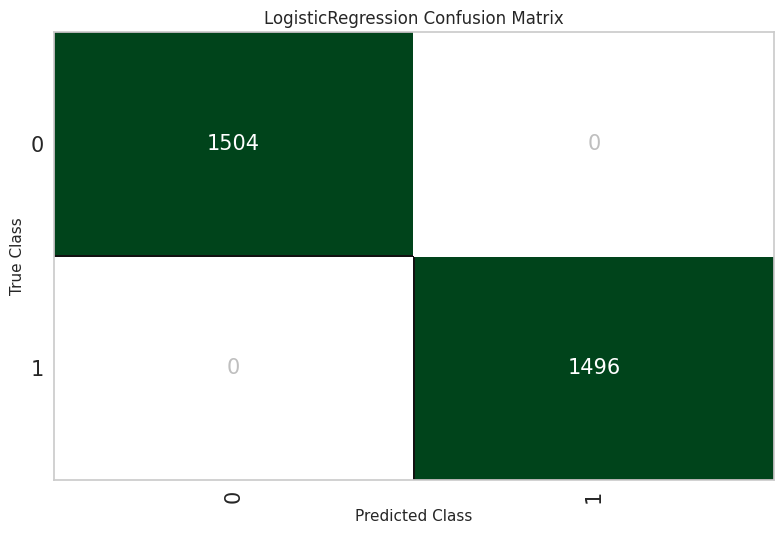

In [8]:
plot_model(lr, plot = 'confusion_matrix')

# Save Model

In [9]:
save_model(lr, model_name='LogisticRegression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('clean_column_names',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                 ('trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=7039,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 'LogisticRegression.pkl')

# Predict New Data

In [79]:
df_new_data = generate_data(5, seed=123)

In [80]:
df_new_data

,ID Anak,Risiko Stunting,Usia (bulan),Berat Badan (kg),Tinggi Badan (cm),Asupan Gizi (Kcal/hari),Kualitas Air (%),Status Ekonomi,Akses Fasilitas Kesehatan,Riwayat Kesehatan
0,1,0,40,13.4,102.1,1513,89,2,1,1
1,2,1,44,11.4,82.0,964,66,1,1,0
2,3,0,23,15.5,85.3,1590,96,3,1,1
3,4,0,25,13.8,95.9,1376,98,2,1,1
4,5,0,48,13.1,96.0,1468,97,3,1,1


In [81]:
predict_model(lr, data = df_new_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,ID Anak,Usia (bulan),Berat Badan (kg),Tinggi Badan (cm),Asupan Gizi (Kcal/hari),Kualitas Air (%),Status Ekonomi,Akses Fasilitas Kesehatan,Riwayat Kesehatan,Risiko Stunting,prediction_label,prediction_score
0,1,40,13.4,102.099998,1513,89,2,1,1,0,0,1.0
1,2,44,11.4,82.000000,964,66,1,1,0,1,1,1.0
2,3,23,15.5,85.300003,1590,96,3,1,1,0,0,1.0
3,4,25,13.8,95.900002,1376,98,2,1,1,0,0,1.0
4,5,48,13.1,96.000000,1468,97,3,1,1,0,0,1.0
